In [34]:
import numpy as np
import pandas as pd
import scipy.stats

In [35]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import pandas.plotting

from IPython import display
from ipywidgets import interact, widgets

In [36]:
import re
import mailbox
import csv

In [37]:
gapminder = pd.read_csv('gapminder.csv')

In [38]:
gapminder.head(3)

,country,year,region,population,life_expectancy,age5_surviving,babies_per_woman,gdp_per_capita,gdp_per_day
0,Afghanistan,1800,Asia,3280000.0,28.21,53.142,7.0,603.0,1.650924
1,Afghanistan,1810,Asia,3280000.0,28.11,53.002,7.0,604.0,1.653662
2,Afghanistan,1820,Asia,3323519.0,28.01,52.862,7.0,604.0,1.653662


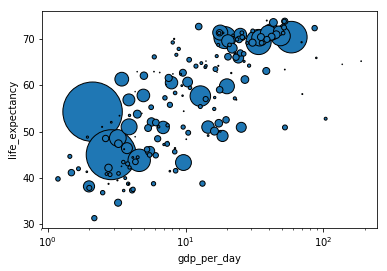

In [39]:
def plotyear(year):
    data = gapminder[gapminder.year == year].sort_values('population',ascending= False)
    area = 5e-6 * data.population
    
    data.plot.scatter('gdp_per_day','life_expectancy',logx=True, s=area,linewidths=1,edgecolors='k')
    
plotyear(1965)

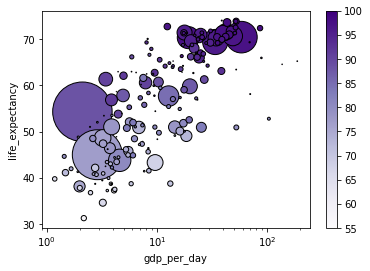

In [43]:
def plotyear(year):
    data = gapminder[gapminder.year == year].sort_values('population',ascending= False)
    area = 5e-6 * data.population
    color = data.age5_surviving
    
    data.plot.scatter('gdp_per_day','life_expectancy',logx=True,
                      s=area, c=color, 
                      colormap=matplotlib.cm.get_cmap('Purples'), vmin=55,vmax=100,
                      linewidths=1,edgecolors='k',sharex=False)
    
plotyear(1965)

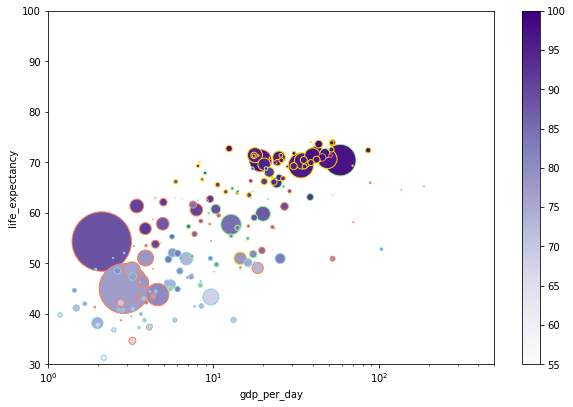

In [44]:
def plotyear(year):
    data = gapminder[gapminder.year == year].sort_values('population',ascending= False)
    area = 5e-6 * data.population
    color = data.age5_surviving
    edgecolor = data.region.map({'Africa':'skyblue','Europe':'gold','America':'palegreen','Asia':'coral'})
    
    data.plot.scatter('gdp_per_day','life_expectancy',logx=True,
                      s=area, c=color, 
                      colormap=matplotlib.cm.get_cmap('Purples'), vmin=55,vmax=100,
                      linewidths=1,edgecolors=edgecolor,sharex=False,
                      figsize = (10,6.5))
    
    plt.axis(xmin=1,xmax=500,ymin=30,ymax=100)
    
plotyear(1965)

In [45]:
interact(plotyear,year=range(1965,2016,10))

interactive(children=(Dropdown(description='year', options=(1965, 1975, 1985, 1995, 2005, 2015), value=1965), Output()), _dom_classes=('widget-interact',))

<function __main__.plotyear>

In [47]:
gapminder[gapminder.year == 2015].population.sum()

7292414176.0

In [48]:
gapminder[gapminder.year == 2015].groupby('region').population.sum()

region
Africa     1.172161e+09
America    9.865771e+08
Asia       4.299142e+09
Europe     8.345345e+08
Name: population, dtype: float64

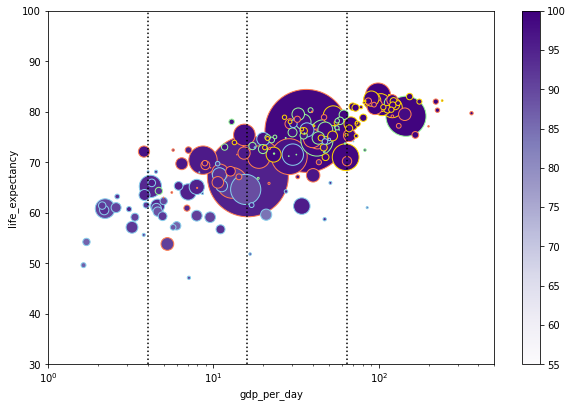

In [50]:
def plotyear(year):
    data = gapminder[gapminder.year == year].sort_values('population',ascending= False)
    area = 5e-6 * data.population
    color = data.age5_surviving
    edgecolor = data.region.map({'Africa':'skyblue','Europe':'gold','America':'palegreen','Asia':'coral'})
    
    data.plot.scatter('gdp_per_day','life_expectancy',logx=True,
                      s=area, c=color, 
                      colormap=matplotlib.cm.get_cmap('Purples'), vmin=55,vmax=100,
                      linewidths=1,edgecolors=edgecolor,sharex=False,
                      figsize = (10,6.5))
    
    for level in[4,16,64]:
        plt.axvline(level,linestyle=':',color='k')
    
    plt.axis(xmin=1,xmax=500,ymin=30,ymax=100)
    
plotyear(2015)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0E876AF0>,
      dtype=object)

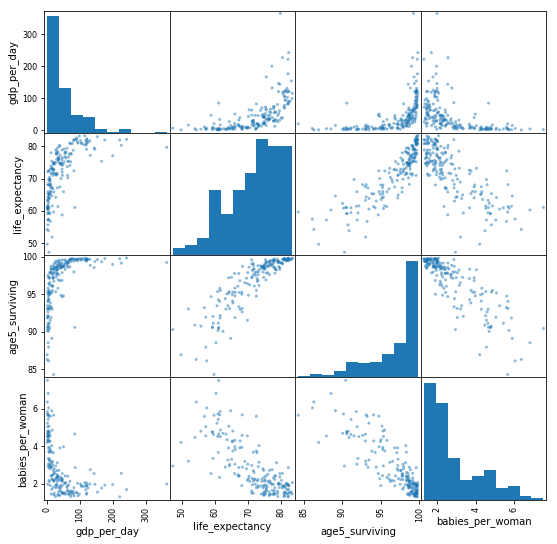

In [55]:
gapminder['log10_gdp_per_day'] = np.log10(data['gdp_per_day'])
data = gapminder.loc[gapminder.year == 2015,['gdp_per_day','life_expectancy','age5_surviving','babies_per_woman']]

pandas.plotting.scatter_matrix(data,figsize=(9,9))